In [1]:
# Import pandas library for data manipulation and analysis, commonly aliased as `pd`.
import pandas as pd

In [2]:
# Load the Titanic dataset from the "train.csv" file into a pandas DataFrame.
# This dataset will be used for data analysis and modeling tasks.

titanic = pd.read_csv("train.csv")

## Data Pre-Processing

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the data types of each column in the Titanic DataFrame.
# This helps in understanding the nature of the data for preprocessing.

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Remove the "Cabin" column from the Titanic DataFrame as it may contain a lot of missing values
# or be irrelevant for the analysis. The operation is performed in place, modifying the original DataFrame.

titanic.drop(columns=["Cabin"], axis=1, inplace=True)

In [6]:
# Count the number of missing values (NaNs) in the "Age" column of the Titanic DataFrame.
# This will help assess the extent of missing data for the "Age" feature.

titanic.Age.isna().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

In [7]:
# Replace missing values in the "Age" column with the median age.

titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

C:\Users\AbdouMagico\AppData\Local\Temp\ipykernel_20420\2509367079.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)


In [8]:
# Convert the "Sex" column to binary values: 1 for male and 0 for female.

titanic["Sex"] = titanic["Sex"].apply(lambda x: 1 if x == "male" else 0)

In [9]:
# Create a new column "FamilySize" by summing "Parch" (parents/children) and "SibSp" (siblings/spouses).

titanic["FamilySize"] = titanic["Parch"] + titanic["SibSp"]

# Remove the "Parch" and "SibSp" columns as their information is now represented in "FamilySize".

titanic.drop(columns=["Parch", "SibSp"], axis=1, inplace=True)

In [10]:
# One-hot encode the "Embarked" column, creating new binary columns for each embarkation port.
# Drop the original "Embarked" column after encoding.

titanic = titanic.join(pd.get_dummies(titanic["Embarked"], prefix="EmbarkedAt")).drop(columns=["Embarked"], axis=1)

In [11]:
# Convert boolean values in the DataFrame to binary: True becomes 1 and False becomes 0.
# Non-boolean values remain unchanged.

titanic = titanic.map(lambda x: 1 if x is True else 0 if x is False else x)

In [12]:
# Create a new column "isAlone" where 1 indicates the passenger is alone (FamilySize == 0) 
# and 0 indicates the passenger is not alone.

titanic["isAlone"] = (titanic["FamilySize"] == 0).astype(int)

In [13]:
# Create a new column "AgeGroup" by categorizing the "Age" column into age groups:
# "child" for ages under 13, "teenager" for ages 13-18, "adult" for ages 19-59, and "senior" for ages 60 and above.

titanic["AgeGroup"] = titanic["Age"].apply(lambda x: "child" if x < 13 else "teenager" if x < 19 else "adult" if x < 60 else "senior")

In [14]:
# Convert the "AgeGroup" categorical values to numeric labels using factorization.
# Each unique age group is assigned a unique integer.

titanic["AgeGroup"] = pd.factorize(titanic["AgeGroup"])[0]

In [15]:
# Calculate the size of each group based on the "Ticket" column, representing the number of passengers with the same ticket.

ticket_group_size = titanic.groupby(by=["Ticket"]).size()

# Map the group sizes to a new column "TicketGroupSize" in the DataFrame.
# This column shows the number of passengers sharing the same ticket.

titanic["TicketGroupSize"] = titanic["Ticket"].map(ticket_group_size)

In [16]:
# Categorize the "Fare" column into fare groups:
# "low" for fares less than or equal to 50,
# "medium" for fares between 51 and 150,
# and "high" for fares greater than 150.

titanic["Fare"] = titanic["Fare"].apply(lambda x: "low" if x <= 50 else "medium" if x <= 150 else "high")

In [17]:
# Convert the "Fare" categorical values to numeric labels using factorization.
# Each unique fare category ("low", "medium", "high") is assigned a unique integer.

titanic["Fare"] = pd.factorize(titanic["Fare"])[0]

In [18]:
# Extract the title from the "Name" column, which is located between the comma and the period.
# The title is then cleaned of any leading or trailing whitespace.

titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Drop the "Name" and "Ticket" columns as their information is no longer needed for analysis.

titanic.drop(columns=["Name", "Ticket"], axis=1, inplace=True)

In [19]:
# One-hot encode the "Title" column, creating binary columns for each title (e.g., "Mr", "Mrs").
# Drop the original "Title" column after encoding.

titanic = titanic.join(pd.get_dummies(titanic["Title"], prefix="Title")).drop(columns=["Title"], axis=1)

In [20]:
# Convert boolean values in the DataFrame to binary: True becomes 1 and False becomes 0.
# Non-boolean values remain unchanged.

titanic = titanic.map(lambda x: 1 if x is True else 0 if x is False else x)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,EmbarkedAt_C,EmbarkedAt_Q,EmbarkedAt_S,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,1,22.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,0,38.0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,0,26.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,0,35.0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,1,35.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Training the Model

In [22]:
# Import the RandomForestClassifier from sklearn.ensemble for building and training a random forest model.
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split from sklearn.model_selection to split the dataset into training and testing sets.
# This helps in evaluating the performance of the model on unseen data.
from sklearn.model_selection import train_test_split

In [23]:
# Initialize a RandomForestClassifier model with parallel processing enabled (n_jobs=-1).
# This allows the model to use all available CPU cores for training, potentially speeding up the process.

model: RandomForestClassifier = RandomForestClassifier(n_jobs=-1)

In [24]:
# Separate the features (X) from the target variable (y).
# X contains all columns except "Survived", which is the target variable for prediction.
# y contains the "Survived" column, representing whether the passenger survived.

X, y = titanic.drop(columns=["Survived"], axis=1), titanic["Survived"]

In [25]:
# Split the dataset into training and testing sets.
# 20% of the data is reserved for testing (test_size=0.2), while the remaining 80% is used for training.
# This helps evaluate the model's performance on unseen data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Train the RandomForestClassifier model using the training data (X_train and y_train).
# The model learns to predict the target variable "Survived" based on the features provided.

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [27]:
# Evaluate the trained RandomForestClassifier model on the test data (X_test and y_test).
# This returns the accuracy of the model, representing the proportion of correctly classified samples.

model.score(X_test, y_test)

0.8547486033519553

In [28]:
# Import matplotlib's pyplot module as plt for creating static, interactive, and animated visualizations.
# This module provides functions to generate various types of plots and charts.

import matplotlib.pyplot as plt

In [29]:
# Extract feature importances from the trained RandomForestClassifier model.
# feature_importances contains the importance scores for each feature, 
# and feature_names contains the names of the features.

feature_importances = model.feature_importances_
feature_names = model.feature_names_in_

# Combine feature names and their corresponding importance scores into a dictionary,
# then sort the dictionary by importance scores in descending order.

sorted_importances = dict(
    sorted(
        zip(feature_names, feature_importances),
        key=lambda x: x[1],
        reverse=True
    )
)

# Display the sorted feature importances.
sorted_importances

{'PassengerId': np.float64(0.22902985094455428),
 'Age': np.float64(0.16224685019149165),
 'Sex': np.float64(0.12173489735919478),
 'Title_Mr': np.float64(0.10788984935293393),
 'Pclass': np.float64(0.08622164496046807),
 'TicketGroupSize': np.float64(0.05859713834540956),
 'FamilySize': np.float64(0.048363835789047176),
 'Title_Miss': np.float64(0.035068093081752696),
 'Fare': np.float64(0.03414286486511552),
 'Title_Mrs': np.float64(0.028992472509820483),
 'AgeGroup': np.float64(0.01869419544941183),
 'EmbarkedAt_S': np.float64(0.015450526257223363),
 'EmbarkedAt_C': np.float64(0.01298603807016171),
 'isAlone': np.float64(0.012478273984713845),
 'EmbarkedAt_Q': np.float64(0.008709853657789264),
 'Title_Master': np.float64(0.0076747784228277825),
 'Title_Dr': np.float64(0.003105647656636929),
 'Title_Rev': np.float64(0.002557867988751098),
 'Title_Col': np.float64(0.0013226073336524088),
 'Title_Don': np.float64(0.0012926592743606467),
 'Title_Major': np.float64(0.0009966127240022674)

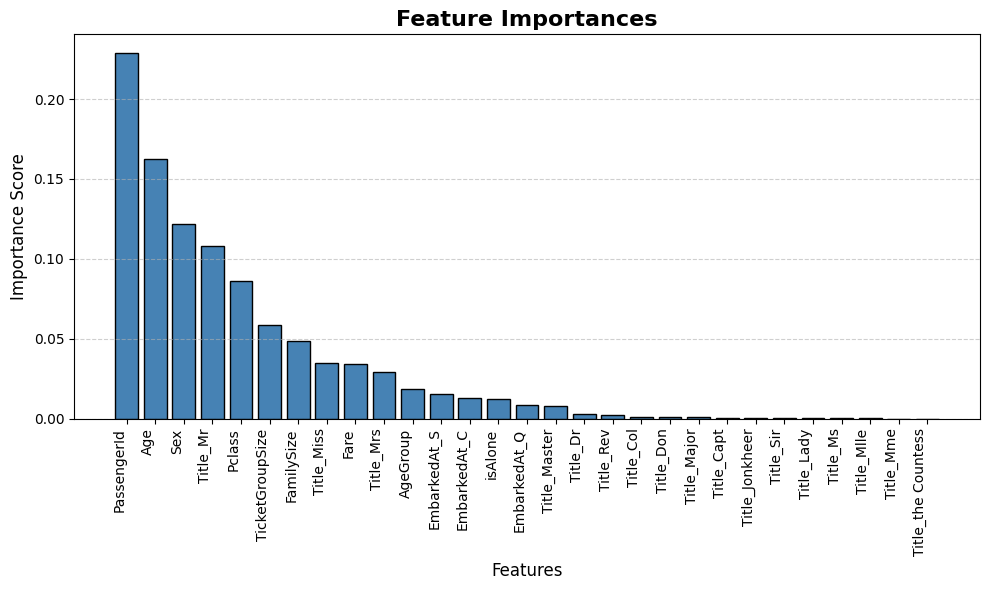

In [30]:
# Create a bar chart to visualize the feature importances.
# The plot shows the importance scores of features in descending order.

plt.figure(figsize=(10, 6))  # Set the figure size for the plot.

# Plot the bar chart with feature names on the x-axis and their importance scores on the y-axis.
plt.bar(sorted_importances.keys(), sorted_importances.values(), color='steelblue', edgecolor='black')

# Set the title and labels with appropriate fonts and sizes.
plt.title('Feature Importances', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Rotate x-axis labels for better readability and adjust font size.
plt.xticks(rotation=90, ha='right', fontsize=10)

# Adjust layout to prevent clipping of labels and add a grid to the y-axis.
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot.
plt.show()

## Enhancing Model Performance

In [31]:
# Import the Optuna library for hyperparameter optimization and automated machine learning.
import optuna

# Import cross_val_score from sklearn.model_selection to evaluate the model using cross-validation.
# This function helps in assessing the model's performance and generalization ability across different subsets of the data.
from sklearn.model_selection import cross_val_score

In [32]:
def objective(trial: optuna.Trial) -> float:
    # Suggest hyperparameters for the RandomForestClassifier using the Optuna trial object.
    n_estimators = trial.suggest_int("n_estimators", 100, 700)  # Number of trees in the forest.
    max_depth = trial.suggest_int("max_depth", 2, 32)            # Maximum depth of each tree.
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32)  # Minimum number of samples required to split an internal node.
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 32)    # Minimum number of samples required to be at a leaf node.

    # Initialize the RandomForestClassifier with suggested hyperparameters.
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        n_jobs=-1,        # Use all available CPU cores.
        random_state=42   # Set random seed for reproducibility.
    )

    # Evaluate the model using cross-validation with 5 folds.
    # Calculate the accuracy score for each fold.
    score: list[float] = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring="accuracy")

    # Compute the mean accuracy score across all folds.
    mean_score = score.mean()

    # Return the mean accuracy score as the objective value for Optuna optimization.
    return mean_score

In [33]:
# Create an Optuna study for hyperparameter optimization.
# The study aims to maximize the objective function's value, using a random sampling strategy for trial generation.

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler())

[I 2024-09-08 20:30:04,070] A new study created in memory with name: no-name-6e9bdb7e-318a-461b-a3b9-6342f6f1b6c5


In [34]:
# Optimize the objective function using the Optuna study.
# Perform 250 trials to find the best hyperparameters based on the objective function.

study.optimize(objective, n_trials=250)

[I 2024-09-08 20:30:10,682] Trial 0 finished with value: 0.7977248104008667 and parameters: {'n_estimators': 155, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.7977248104008667.
[I 2024-09-08 20:30:14,075] Trial 1 finished with value: 0.7920811582783414 and parameters: {'n_estimators': 577, 'max_depth': 22, 'min_samples_split': 20, 'min_samples_leaf': 23}. Best is trial 0 with value: 0.7977248104008667.
[I 2024-09-08 20:30:16,955] Trial 2 finished with value: 0.7977248104008667 and parameters: {'n_estimators': 508, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.7977248104008667.
[I 2024-09-08 20:30:20,240] Trial 3 finished with value: 0.8202009258347287 and parameters: {'n_estimators': 513, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.8202009258347287.
[I 2024-09-08 20:30:20,959] Trial 4 finished with value: 0.8117502216093765 and parameters

In [35]:
# Visualize the optimization history of the Optuna study.
# This plot shows how the objective function value has evolved across different trials.

optuna.visualization.plot_optimization_history(study)

In [36]:
# Visualize the importance of each hyperparameter based on the Optuna study.
# This plot helps to understand which hyperparameters most significantly impact the objective function.

optuna.visualization.plot_param_importances(study)

In [37]:
# Visualize the relationship between the specified hyperparameters and the objective function.
# The plot shows how changes in hyperparameters ("n_estimators", "max_depth", "min_samples_split", "min_samples_leaf") affect the optimization outcome.

optuna.visualization.plot_slice(study, params=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf"])

In [38]:
# Retrieve the best hyperparameters found during the optimization process from the Optuna study.

best_params = study.best_params

best_params

{'n_estimators': 157,
 'max_depth': 26,
 'min_samples_split': 9,
 'min_samples_leaf': 5}

In [39]:
# Extract the best hyperparameter values from the Optuna study results.

best_n_estimators = best_params["n_estimators"]  # Optimal number of trees in the forest.
best_max_depth = best_params["max_depth"]        # Optimal maximum depth of the trees.
best_min_samples_split = best_params["min_samples_split"]  # Optimal minimum number of samples required to split an internal node.
best_min_samples_leaf = best_params["min_samples_leaf"]    # Optimal minimum number of samples required to be at a leaf node.

In [40]:
# Initialize the RandomForestClassifier with the best hyperparameters found from the Optuna study.
# This model will use the optimal values for number of trees, maximum depth, minimum samples to split, and minimum samples at a leaf node.

best_model: RandomForestClassifier = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf
)

In [41]:
# Train the RandomForestClassifier model using the best hyperparameters on the training data (X_train and y_train).
# This step allows the model to learn from the training dataset.

best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=26, min_samples_leaf=5, min_samples_split=9,
                       n_estimators=157)

In [42]:
# Evaluate the performance of the trained RandomForestClassifier model on the test data (X_test and y_test).
# This returns the accuracy of the model, which indicates the proportion of correctly classified samples in the test set.

best_model.score(X_test, y_test)

0.8770949720670391

In [43]:
import pickle

# Attempt to save the trained RandomForestClassifier model to a file using pickle.
# The model is serialized and saved as 'titanic_model.pkl' for future use.

try:
    with open("titanic_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
    print("Model saved successfully as 'titanic_model.pkl'")
except Exception as e:
    # Print an error message if an exception occurs during the saving process.
    print(f"An error occurred while saving the model: {e}")

Model saved successfully as 'titanic_model.pkl'


In [44]:
# Load the test dataset from 'test.csv' into a DataFrame.
# Extract the "PassengerId" column to keep track of passenger identifiers for predictions.

test_titanic = pd.read_csv("test.csv")
passenger_ids = test_titanic["PassengerId"]

In [45]:
test_titanic.drop(columns=["Cabin", "PassengerId"], axis=1, inplace=True)

# Perform the same preprocessing steps as the training set
test_titanic["Age"].fillna(test_titanic["Age"].median(), inplace=True)
test_titanic["Sex"] = test_titanic["Sex"].apply(lambda x: 1 if x == "male" else 0)
test_titanic["FamilySize"] = test_titanic["Parch"] + test_titanic["SibSp"]
test_titanic.drop(columns=["Parch", "SibSp"], axis=1, inplace=True)
test_titanic = test_titanic.join(pd.get_dummies(test_titanic["Embarked"], prefix="EmbarkedAt")).drop(columns=["Embarked"], axis=1)
test_titanic["isAlone"] = (test_titanic["FamilySize"] == 0).astype(int)
test_titanic["AgeGroup"] = test_titanic["Age"].apply(lambda x: "child" if x < 13 else "teenager" if x < 19 else "adult" if x < 60 else "senior")
test_titanic["AgeGroup"] = pd.factorize(test_titanic["AgeGroup"])[0]
ticket_group_size = test_titanic.groupby(by=["Ticket"]).size()
test_titanic["TicketGroupSize"] = test_titanic["Ticket"].map(ticket_group_size)
test_titanic["Fare"] = test_titanic["Fare"].apply(lambda x: "low" if x <= 50 else "medium" if x <= 150 else "high")
test_titanic["Fare"] = pd.factorize(test_titanic["Fare"])[0]
test_titanic['Title'] = test_titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_titanic.drop(columns=["Name", "Ticket"], axis=1, inplace=True)
test_titanic = test_titanic.join(pd.get_dummies(test_titanic["Title"], prefix="Title")).drop(columns=["Title"], axis=1)

C:\Users\AbdouMagico\AppData\Local\Temp\ipykernel_20420\3232756059.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [46]:
import joblib

# Load the previously saved RandomForestClassifier model from the file 'titanic_model.pkl' using joblib.
# This allows you to use the trained model for making predictions or further analysis.

model = joblib.load("titanic_model.pkl")

In [47]:
# Display the column names of the test dataset to understand its structure and identify which features are available for prediction.

test_titanic.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'EmbarkedAt_C',
       'EmbarkedAt_Q', 'EmbarkedAt_S', 'isAlone', 'AgeGroup',
       'TicketGroupSize', 'Title_Col', 'Title_Dona', 'Title_Dr',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Rev'],
      dtype='object')

In [48]:
# Display the column names of the training dataset to understand its structure and identify the features used for model training.

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize',
       'EmbarkedAt_C', 'EmbarkedAt_Q', 'EmbarkedAt_S', 'isAlone', 'AgeGroup',
       'TicketGroupSize', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess'],
      dtype='object')

In [49]:
# Define the expected column names for the test dataset to match the training dataset's structure.
expected_columns = [
    'PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'EmbarkedAt_C',
    'EmbarkedAt_Q', 'EmbarkedAt_S', 'isAlone', 'AgeGroup', 'TicketGroupSize', 
    'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 
    'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 
    'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess'
]

# Add any missing columns to the test dataset with default values of 0.
# This ensures that the test dataset has the same structure as the training dataset.
for column in expected_columns:
    if column not in test_titanic.columns:
        test_titanic[column] = 0

# Reorder the columns in the test dataset to match the expected column order.
test_titanic = test_titanic[expected_columns]

# Restore the 'PassengerId' column with the original passenger IDs from the test dataset.
test_titanic["PassengerId"] = passenger_ids

In [50]:
# Use the loaded model to make predictions on the test dataset.
# The 'predict' method generates the predicted class labels for each sample in the test dataset.

predictions = model.predict(test_titanic)

In [51]:
# Create a DataFrame to store the predictions.
# The DataFrame includes 'PassengerId' from the test dataset and the corresponding predicted 'Survived' values.

output = pd.DataFrame({
    'PassengerId': test_titanic['PassengerId'],
    'Survived': predictions
})

# Display the DataFrame containing the predictions.
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
# Save the predictions to a CSV file named 'submission.csv'.
# The file will include 'PassengerId' and 'Survived' columns, formatted as required for submission.

output.to_csv('submission.csv', index=False)

## Done